# CS316 Project - Introduction to AI and Data Science

## Group Information
---
**Group Members:**
* Faisal Alghamdi - 221110726
* Faisal Alfaraj - 222110025
* Ali alkhalidy - 222111397

**Project Topic:** Sustainable Agriculture: Leveraging AI for Crop Yield Optimization and Pest Detection

## Section 1: Problem Definition
---
### Instructions
In this section, you must:
1. Define your research questions (minimum 3 questions)
2. Explain how your project aligns with UN Sustainable Development Goals (SDGs)
3. Identify the specific problem you're addressing
4. Describe the potential impact of your solution

**Research Questions Example Format:**
* RQ1: How does [variable X] affect [sustainability outcome Y]?
* RQ2: What is the relationship between [factor A] and [factor B] in [your domain]?
* RQ3: Can we predict [sustainability metric] using [available data]?

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
mrigaankjaswal_crop_yield_prediction_dataset_path = kagglehub.dataset_download('mrigaankjaswal/crop-yield-prediction-dataset')

print('Data source import complete.')


Data source import complete.


In [ ]:
!pip install scikeras catboost

In [ ]:
 #Import necessary libraries
import pandas as pd
import numpy as np
import tensorflow as tf
from scikeras.wrappers import KerasRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import (
    train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score, GroupKFold
)
from sklearn.metrics import (
    r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
)
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.feature_selection import mutual_info_regression
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
import time  # For tracking training time

# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Ensure plots are displayed in the notebook
%matplotlib inline

# Problem Definition Documentation
def document_problem():
    """
    Document the problem definition and SDG alignment.
    """
    # Research Question Exploration
    print("Research Questions:")
    print("1. How does average rainfall affect crop yield across different regions and crop types?")
    print("2. What is the relationship between pesticide usage and crop productivity while maintaining environmental sustainability?")
    print("3. Can we predict crop yields using environmental data such as soil conditions, rainfall, and temperature?")

    # SDG Alignment
    print("\nAlignment with UN Sustainable Development Goals (SDGs):")
    print("SDG 2 (Zero Hunger): Enhances food security by optimizing crop yields and reducing losses due to pests or diseases.")
    print("SDG 12 (Responsible Consumption and Production): Promotes efficient resource use and reduces reliance on synthetic fertilizers.")
    print("SDG 13 (Climate Action): Aids in climate-resilient farming practices through actionable insights.")

    # Problem Overview
    print("\nProblem Overview:")
    print("Modern agriculture heavily relies on synthetic fertilizers and pesticides, causing environmental harm.")
    print("This project aims to provide farmers with actionable insights for optimized resource use, balancing productivity and sustainability.")

    # Potential Impact
    print("\nPotential Impact:")
    print("- Farmers: Improved productivity and reduced costs through data-driven insights.")
    print("- Environment: Reduced chemical usage and optimized resource allocation.")
    print("- Communities: Enhanced food security through sustainable practices.")

# Run the problem documentation
document_problem()

dataset_path= mrigaankjaswal_crop_yield_prediction_dataset_path

Research Questions:
1. How does average rainfall affect crop yield across different regions and crop types?
2. What is the relationship between pesticide usage and crop productivity while maintaining environmental sustainability?
3. Can we predict crop yields using environmental data such as soil conditions, rainfall, and temperature?

Alignment with UN Sustainable Development Goals (SDGs):
SDG 2 (Zero Hunger): Enhances food security by optimizing crop yields and reducing losses due to pests or diseases.
SDG 12 (Responsible Consumption and Production): Promotes efficient resource use and reduces reliance on synthetic fertilizers.
SDG 13 (Climate Action): Aids in climate-resilient farming practices through actionable insights.

Problem Overview:
Modern agriculture heavily relies on synthetic fertilizers and pesticides, causing environmental harm.
This project aims to provide farmers with actionable insights for optimized resource use, balancing productivity and sustainability.

Potentia

## Section 2: Data Collection & Preparation
---
### Instructions
Document your data source(s) and prepare your dataset:
1. **Data Source Documentation:**
   * Dataset name and source
   * Time period covered
   * Number of records and features
   * Data collection methodology

2. **Initial Data Assessment:**
   * Run and document basic statistics
   * Check for missing values
   * Identify potential data quality issues

In [ ]:
# 2. Data Collection
def load_dataset(dataset_path):
    """
    Load the dataset and perform initial assessment.
    """
    # Ensure dataset_path points directly to the CSV file
    import os
    if os.path.isdir(dataset_path):
        # If the path is a directory, find the CSV file within it
        csv_files = [file for file in os.listdir(dataset_path) if file.endswith('.csv')]
        if not csv_files:
            raise FileNotFoundError("No CSV file found in the provided dataset path.")
        dataset_path = os.path.join(dataset_path, csv_files[0])  # Use the first CSV file found

    # Now read the CSV file
    df = pd.read_csv(dataset_path)
    print("\nDataset Source Information:")
    print("Dataset Name: Crop Yield Prediction Dataset")
    print("Source: https://www.kaggle.com/datasets/mrigaankjaswal/crop-yield-prediction-dataset")
    print("Time Period: 1990–2013")
    print("Features: Includes average rainfall, temperature, pesticides used, and crop yield.")
    print("\nDataset Shape:", df.shape)
    print("\nDataset Info:")
    df.info()
    print("\nMissing Values:")
    print(df.isnull().sum())

    return df  # Ensure proper indentation here (aligned with the function block)

# Adjust dataset_path to use kagglehub's path
dataset_path = mrigaankjaswal_crop_yield_prediction_dataset_path
yield_data = load_dataset(dataset_path)

# 3. Data Preparation
# Data Cleaning
yield_data_cleaned = yield_data.drop(columns=['Unnamed: 0'], errors='ignore').dropna()

# Reset index after dropping rows
yield_data_cleaned.reset_index(drop=True, inplace=True)


Dataset Source Information:
Dataset Name: Crop Yield Prediction Dataset
Source: https://www.kaggle.com/datasets/mrigaankjaswal/crop-yield-prediction-dataset
Time Period: 1990–2013
Features: Includes average rainfall, temperature, pesticides used, and crop yield.

Dataset Shape: (28242, 8)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     28242 non-null  int64  
 1   Area                           28242 non-null  object 
 2   Item                           28242 non-null  object 
 3   Year                           28242 non-null  int64  
 4   hg/ha_yield                    28242 non-null  int64  
 5   average_rain_fall_mm_per_year  28242 non-null  float64
 6   pesticides_tonnes              28242 non-null  float64
 7   avg_temp                       28242 non-

## Section 3: Exploratory Data Analysis (EDA)
---
### Instructions
Task. Understand your data patterns and perform comprehensive EDA to understand your data:

**1. Required Analyses:**
   * Descriptive Statistics
   * Univariate analysis for each key variable
   * Bivariate analysis between target and features
   * Correlation analysis
   * Time series patterns (if applicable)

**2. Required Visualizations (minimum 5):**
   * Distribution plots
   * Correlation heatmap
   * Feature relationships
   * Target variable analysis
   * Time-based trends (if applicable)

,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,28242.000000,28242.000000,28242.00000,28242.000000,28242.000000
mean,2001.544296,77053.332094,1149.05598,37076.909344,20.542627
std,7.051905,84956.612897,709.81215,59958.784665,6.312051
min,1990.000000,50.000000,51.00000,0.040000,1.300000
25%,1995.000000,19919.250000,593.00000,1702.000000,16.702500
50%,2001.000000,38295.000000,1083.00000,17529.440000,21.510000
75%,2008.000000,104676.750000,1668.00000,48687.880000,26.000000
max,2013.000000,501412.000000,3240.00000,367778.000000,30.650000


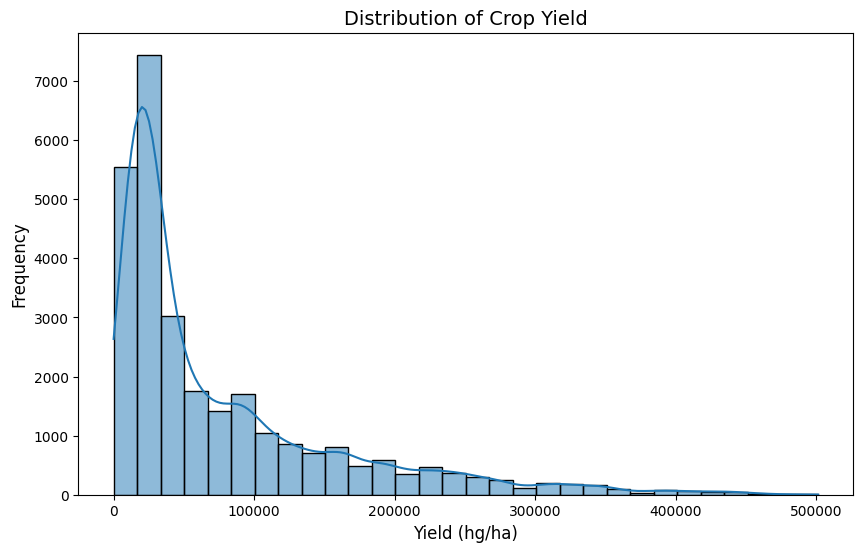

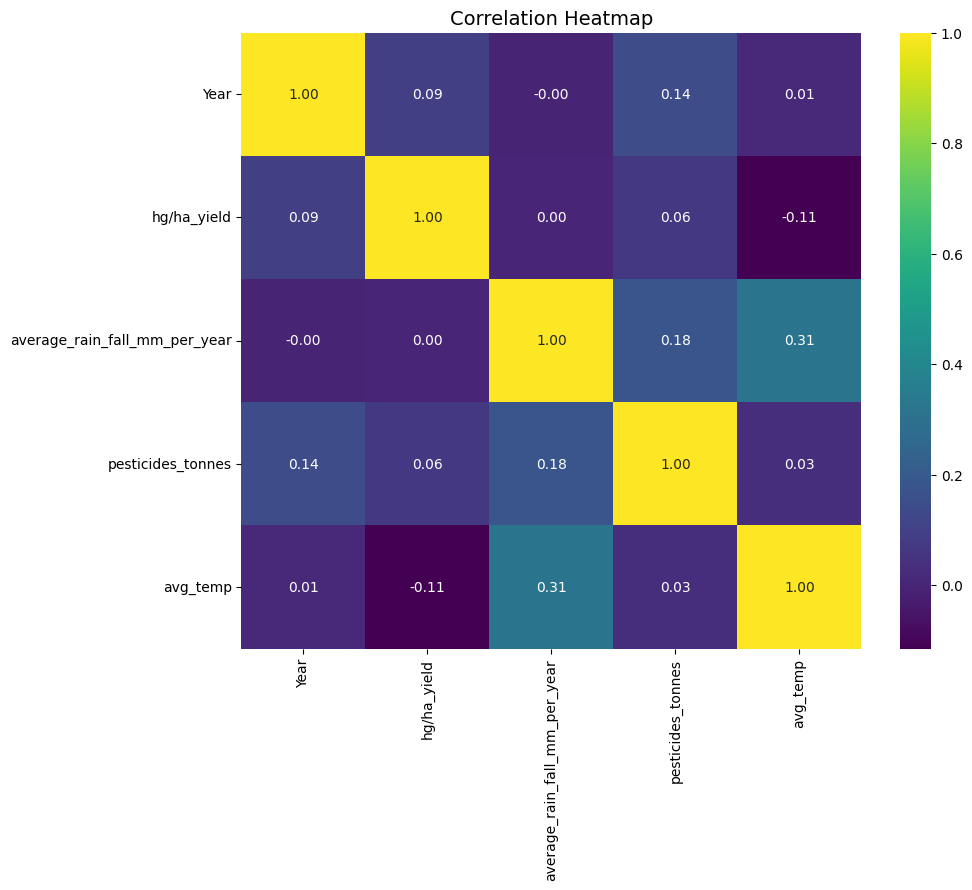

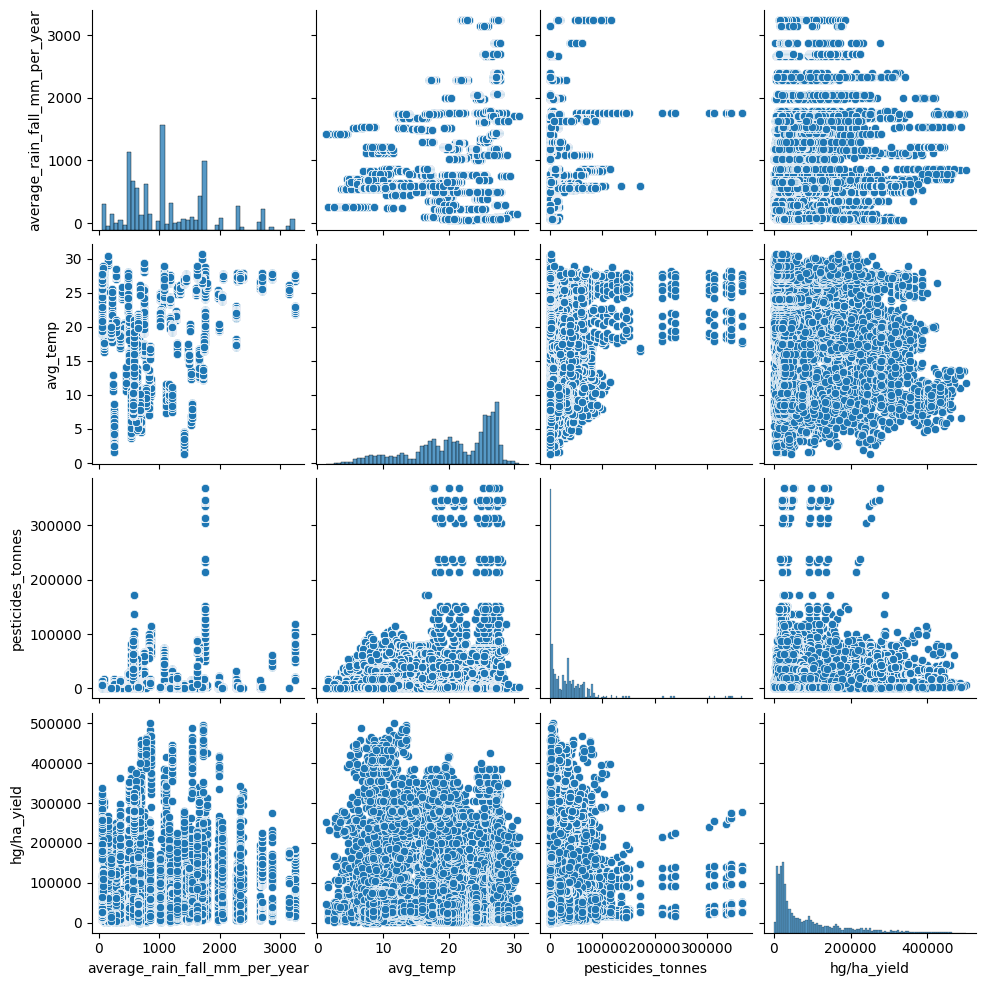

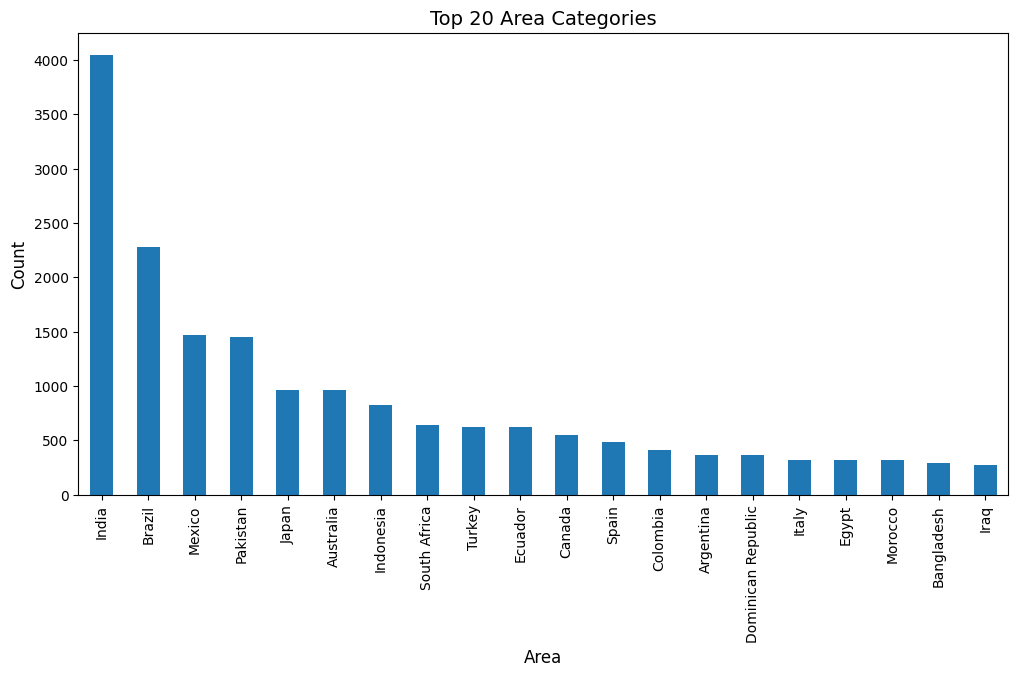

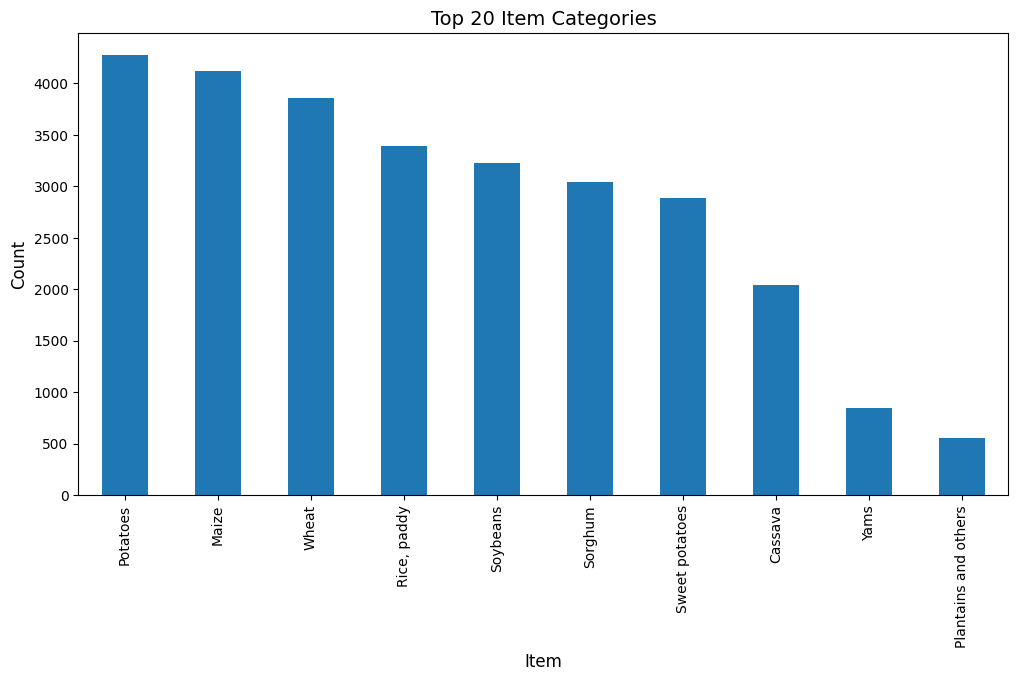

In [ ]:
# 4. Exploratory Data Analysis (EDA)
def perform_eda(df):
    """
    Conduct exploratory data analysis.
    """
    # Descriptive Statistics
    display(df.describe())

    # Target Variable Distribution
    plt.figure(figsize=(10, 6))
    sns.histplot(df['hg/ha_yield'], kde=True, bins=30)
    plt.title('Distribution of Crop Yield', fontsize=14)
    plt.xlabel('Yield (hg/ha)', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.show()

    # Correlation Heatmap
    plt.figure(figsize=(10, 8))
    correlation_matrix = df.corr(numeric_only=True)
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="viridis")
    plt.title('Correlation Heatmap', fontsize=14)
    plt.show()

    # Pairplot
    sns.pairplot(df[['average_rain_fall_mm_per_year', 'avg_temp', 'pesticides_tonnes', 'hg/ha_yield']])
    plt.show()

    # Categorical Variable Analysis
    categorical_cols = ['Area', 'Item']
    for col in categorical_cols:
        plt.figure(figsize=(12, 6))
        df[col].value_counts().head(20).plot(kind='bar')
        plt.title(f'Top 20 {col} Categories', fontsize=14)
        plt.xlabel(col, fontsize=12)
        plt.ylabel('Count', fontsize=12)
        plt.show()

perform_eda(yield_data_cleaned)

## Section 4: Feature Engineering
---
### Instructions
Document your feature engineering process:

**1. Feature Creation:**
   * Create new features based on domain knowledge
   * Document the rationale for each new feature
   * Validate feature usefulness

**2. Feature Selection:**
   * Identify most important features
   * Remove redundant features
   * Document selection criteria

In [ ]:
# 5. Feature Engineering
def engineer_features(df):
    """
    Create and select features without using the target variable.
    """
    df_engineered = df.copy()
    # Interaction Features
    df_engineered['rainfall_times_pesticides'] = (
        df_engineered['average_rain_fall_mm_per_year'] * df_engineered['pesticides_tonnes']
    )
    df_engineered['temp_times_pesticides'] = df_engineered['avg_temp'] * df_engineered['pesticides_tonnes']
    df_engineered['rainfall_times_temp'] = (
        df_engineered['average_rain_fall_mm_per_year'] * df_engineered['avg_temp']
    )
    # Polynomial Features
    for col in ['average_rain_fall_mm_per_year', 'avg_temp', 'pesticides_tonnes']:
        df_engineered[f'{col}^2'] = df_engineered[col] ** 2
        df_engineered[f'{col}^3'] = df_engineered[col] ** 3
    return df_engineered

# Apply feature engineering to the entire dataset
yield_data_fe = engineer_features(yield_data_cleaned)

# 6. Data Preprocessing
# 6.1 Encoding Categorical Variables
def label_encode_features(df, categorical_cols):
    """
    Label encode categorical features.
    """
    df_encoded = df.copy()
    label_encoders = {}
    for col in categorical_cols:
        le = LabelEncoder()
        df_encoded[col] = le.fit_transform(df_encoded[col])
        label_encoders[col] = le
    return df_encoded, label_encoders

categorical_cols = ['Area', 'Item', 'Year']
yield_data_encoded, label_encoders = label_encode_features(yield_data_fe, categorical_cols)

# 6.2 Feature Selection
def select_features(X, y, num_features=50):
    """
    Select top features based on mutual information.
    """
    mi = mutual_info_regression(X, y)
    mi = pd.Series(mi, index=X.columns)
    mi.sort_values(ascending=False, inplace=True)
    print("\nTop Features based on Mutual Information:")
    print(mi.head(num_features))
    selected_features = mi.index[:num_features].tolist()
    return selected_features

# Separate features and target
X = yield_data_encoded.drop(columns=['hg/ha_yield'])
y = yield_data_encoded['hg/ha_yield']

selected_features = select_features(X, y, num_features=50)
X_selected = X[selected_features]

# 6.3 Data Splitting
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, random_state=42, stratify=yield_data_encoded['Area']
)

# 6.4 Scaling Numerical Features
# Identify numerical columns (excluding categorical ones)
numerical_cols = [col for col in X_train.columns if col not in categorical_cols]

# Initialize scaler
scaler = StandardScaler()

# Fit and transform training data
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])

# Transform test data
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])



Top Features based on Mutual Information:
pesticides_tonnes                  2.890580
pesticides_tonnes^2                2.885156
rainfall_times_pesticides          2.882819
pesticides_tonnes^3                2.869055
Area                               1.896612
average_rain_fall_mm_per_year      1.864213
average_rain_fall_mm_per_year^2    1.832969
average_rain_fall_mm_per_year^3    1.792000
Year                               1.481513
Item                               1.306061
temp_times_pesticides              0.588758
rainfall_times_temp                0.460805
avg_temp                           0.238767
avg_temp^2                         0.232603
avg_temp^3                         0.232297
dtype: float64


## Section 5: Model Development
---
### Instructions
Develop and train your models:

**1. Required Steps:**
   * Split data into training and testing sets
   * Implement at least 3 different models
   * Document model selection rationale
   * Implement cross-validation

**2. Memory Optimization Requirements:**
   * Use appropriate data types
   * Implement batch processing if needed
   * Document memory usage

In [ ]:
# 7. Modeling
# 7.1 Model Training
def train_models(X_train, y_train):
    """
    Train and compare different models.
    """
    # Define models
    models = {
        'Linear Regression': LinearRegression(),
        'Ridge Regression': Ridge(),
        'Lasso Regression': Lasso(),
        'Random Forest': RandomForestRegressor(random_state=42),
        'Gradient Boosting': GradientBoostingRegressor(random_state=42),
        'XGBoost': XGBRegressor(random_state=42, objective='reg:squarederror'),
        'CatBoost': CatBoostRegressor(random_seed=42, verbose=0),
    }

    best_models = {}
    cv_results = {}
    training_times = {}

    for name, model in models.items():
        print(f"\nTraining {name}...")
        start_time = time.time()  # Start timing

        # Hyperparameter tuning (if applicable)
        if name == 'Random Forest':
            param_grid = {
                'n_estimators': [100, 200],
                'max_depth': [10, 20, None],
                'min_samples_split': [2, 5],
                'min_samples_leaf': [1, 2]
            }
            grid_search = RandomizedSearchCV(
                model, param_distributions=param_grid, n_iter=10,
                cv=3, scoring='r2', n_jobs=-1, random_state=42
            )
            grid_search.fit(X_train, y_train)
            best_models[name] = grid_search.best_estimator_
            cv_results[name] = {
                "Best Parameters": grid_search.best_params_,
                "Best Cross-Validation R²": grid_search.best_score_
            }
        elif name == 'CatBoost':
            # CatBoost handles categorical features natively
            categorical_features_indices = [
                X_train.columns.get_loc(col) for col in categorical_cols if col in X_train.columns
            ]
            model.set_params(cat_features=categorical_features_indices)
            model.fit(X_train, y_train, eval_set=(X_train, y_train), verbose=False)
            best_models[name] = model
            cv_scores = cross_val_score(
                model, X_train, y_train, cv=3, scoring='r2', n_jobs=-1
            )
            cv_results[name] = {
                "Best Cross-Validation R²": cv_scores.mean(),
                "Standard Deviation R²": cv_scores.std()
            }
        else:
            model.fit(X_train, y_train)
            best_models[name] = model
            cv_scores = cross_val_score(
                model, X_train, y_train, cv=3, scoring='r2', n_jobs=-1
            )
            cv_results[name] = {
                "Best Cross-Validation R²": cv_scores.mean(),
                "Standard Deviation R²": cv_scores.std()
            }

        end_time = time.time()  # End timing
        training_times[name] = end_time - start_time  # Record training time

    return best_models, cv_results, training_times

# Train models
best_models, cv_results, training_times = train_models(X_train, y_train)


Training Linear Regression...

Training Ridge Regression...

Training Lasso Regression...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.059e+13, tolerance: 1.644e+10
  model = cd_fast.enet_coordinate_descent(



Training Random Forest...


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,



Training Gradient Boosting...

Training XGBoost...

Training CatBoost...


## Section 6: Model Evaluation
---
### Instructions
Evaluate your models thoroughly:

**1. Required Metrics:**
   * Accuracy/RMSE (depending on problem type)
   * Precision, Recall, F1-Score (for classification)
   * Cross-validation scores
   * Model comparison analysis

**2. Required Visualizations:**
   * Confusion matrix (for classification)
   * ROC curves (for classification)
   * Prediction vs Actual plots (for regression)
   * Feature importance plots


Evaluating Linear Regression...
R² Score (Train): 0.1125
R² Score (Test): 0.1112
Generalization Percentage: 98.86%
MSE (Train): 6458376333.8791 | MSE (Test): 6200518965.4292
MAE (Train): 62293.7740 | MAE (Test): 61063.7877
MAPE (Train): 2.3367 | MAPE (Test): 2.4210


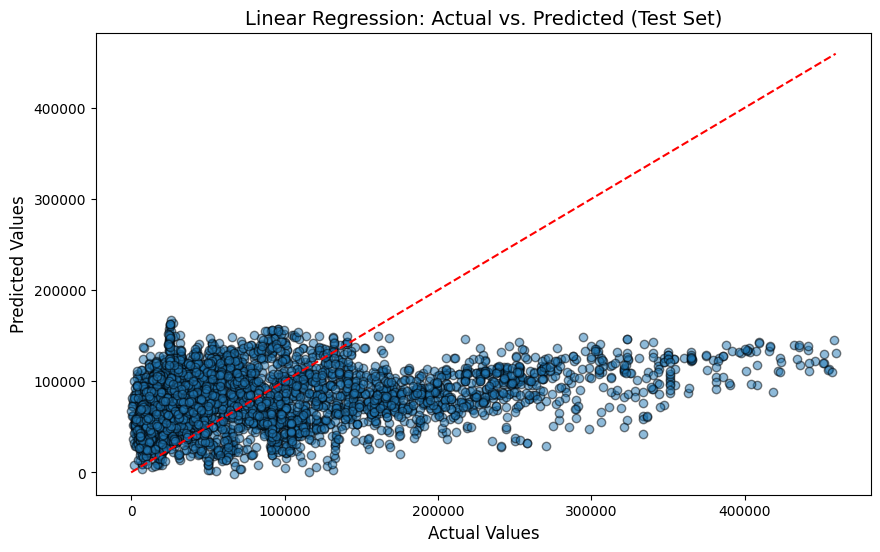

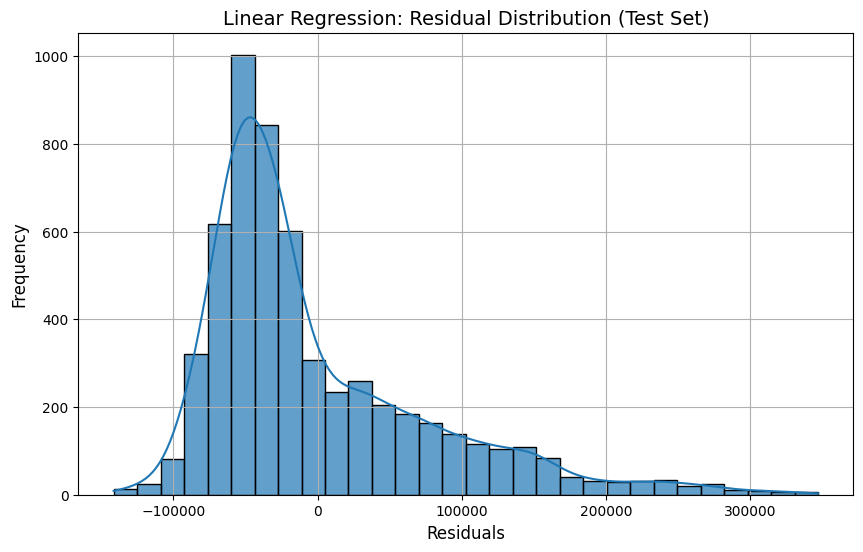


Evaluating Ridge Regression...
R² Score (Train): 0.1124
R² Score (Test): 0.1112
Generalization Percentage: 98.87%
MSE (Train): 6459190430.5366 | MSE (Test): 6201160669.5532
MAE (Train): 62293.0986 | MAE (Test): 61066.4798
MAPE (Train): 2.3383 | MAPE (Test): 2.4214


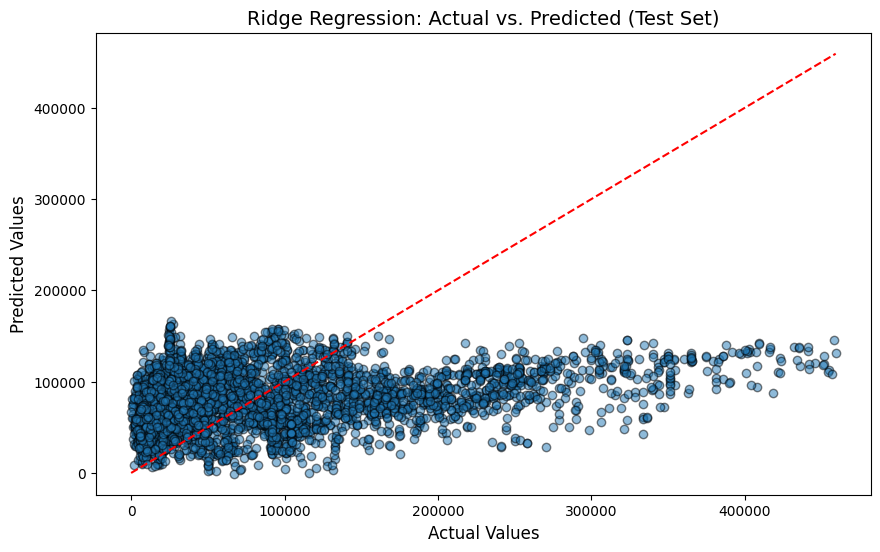

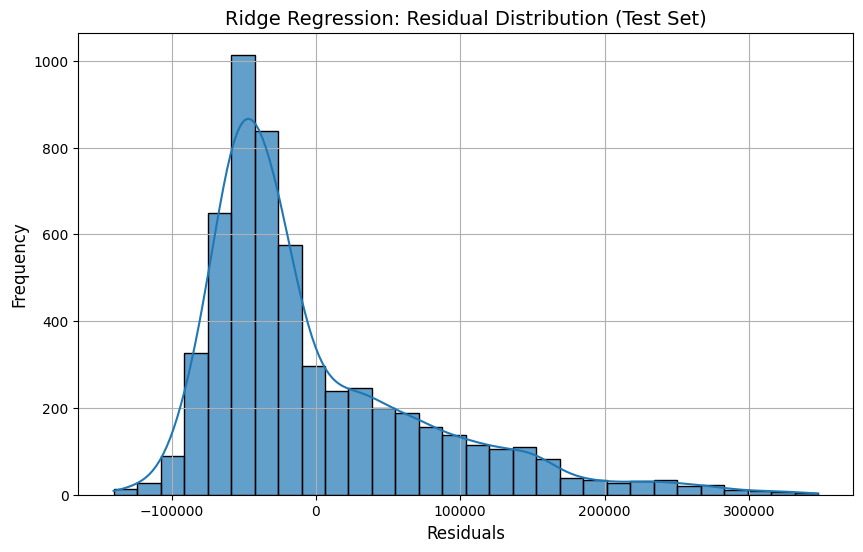


Evaluating Lasso Regression...
R² Score (Train): 0.1105
R² Score (Test): 0.1093
Generalization Percentage: 98.92%
MSE (Train): 6473105379.4456 | MSE (Test): 6214005512.9861
MAE (Train): 62319.3677 | MAE (Test): 61103.4122
MAPE (Train): 2.3420 | MAPE (Test): 2.4213


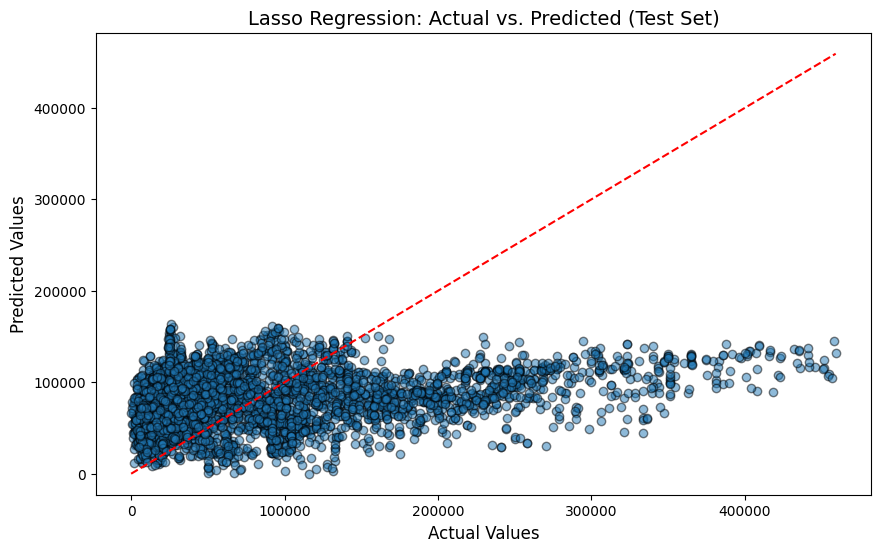

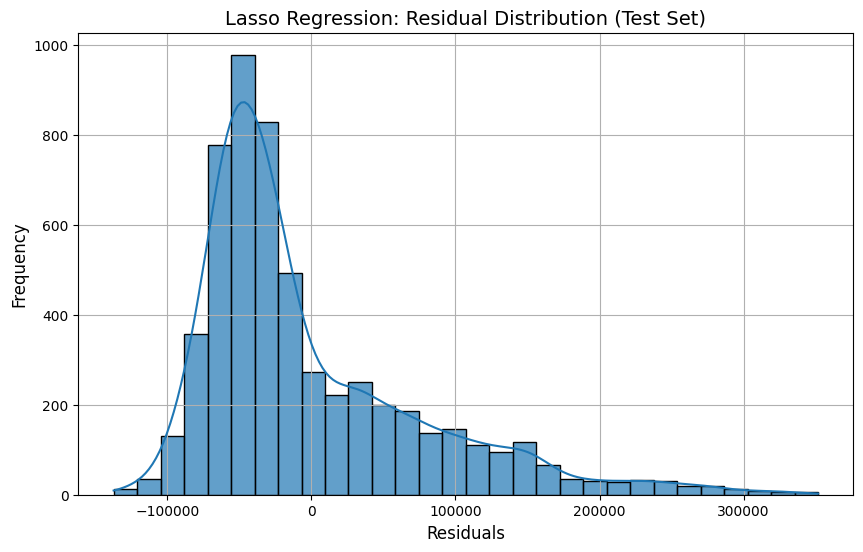


Evaluating Random Forest...
R² Score (Train): 0.9978
R² Score (Test): 0.9847
Generalization Percentage: 98.68%
MSE (Train): 15957373.5429 | MSE (Test): 106876560.6171
MAE (Train): 1547.9634 | MAE (Test): 3952.7685
MAPE (Train): 0.0408 | MAPE (Test): 0.1205


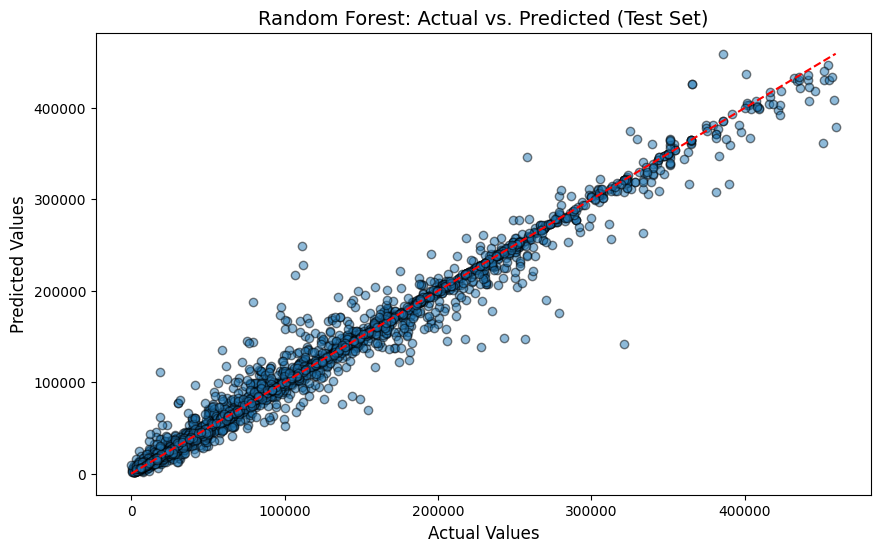

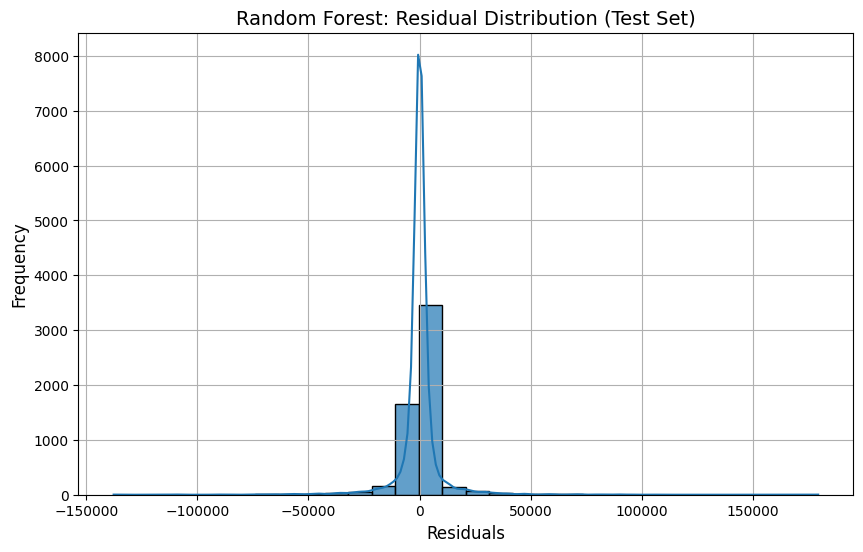


Evaluating Gradient Boosting...
R² Score (Train): 0.8340
R² Score (Test): 0.8280
Generalization Percentage: 99.29%
MSE (Train): 1208374095.5048 | MSE (Test): 1199821126.0721
MAE (Train): 21704.4448 | MAE (Test): 21776.4948
MAPE (Train): 0.5886 | MAPE (Test): 0.6267


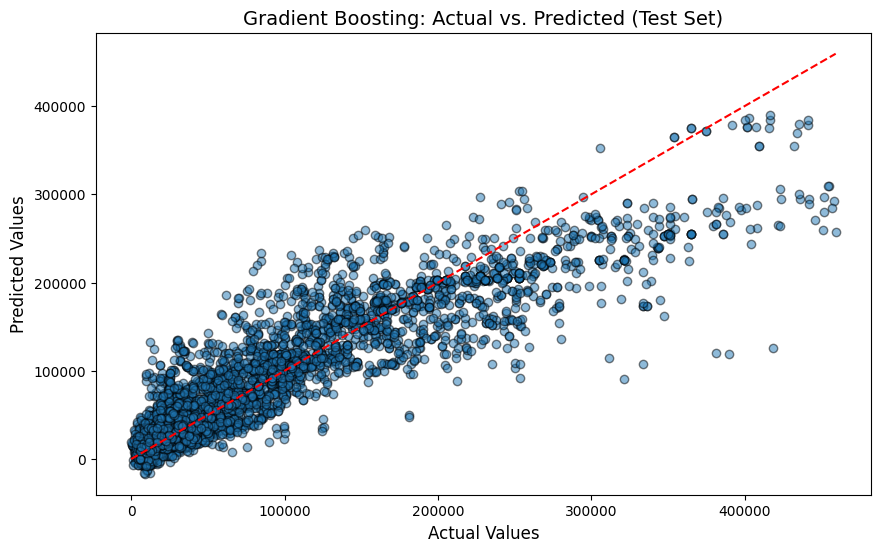

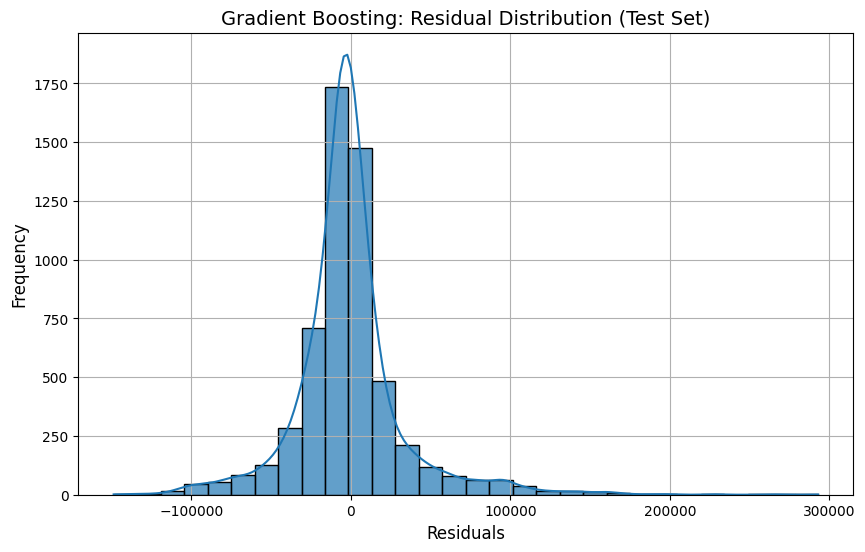


Evaluating XGBoost...
R² Score (Train): 0.9858
R² Score (Test): 0.9736
Generalization Percentage: 98.76%
MSE (Train): 103549386.0781 | MSE (Test): 184464643.2553
MAE (Train): 6118.2155 | MAE (Test): 7687.9824
MAPE (Train): 0.1731 | MAPE (Test): 0.2281


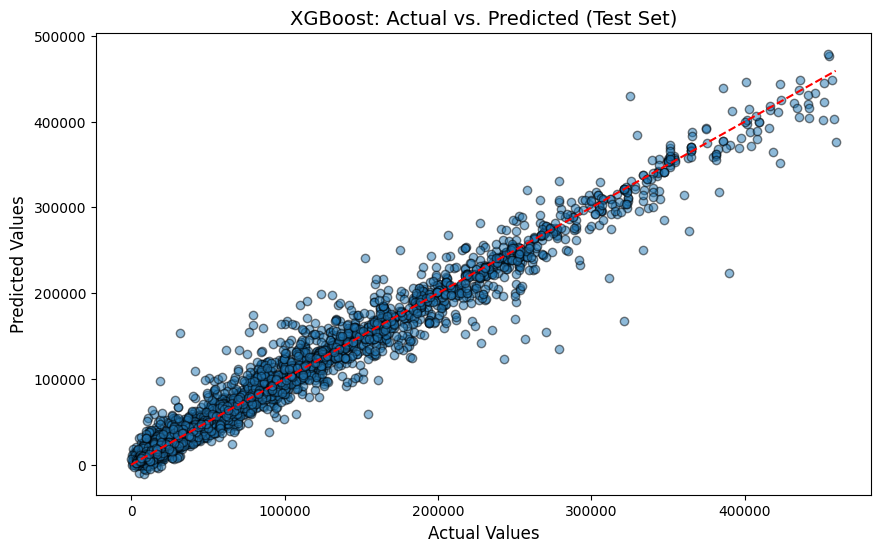

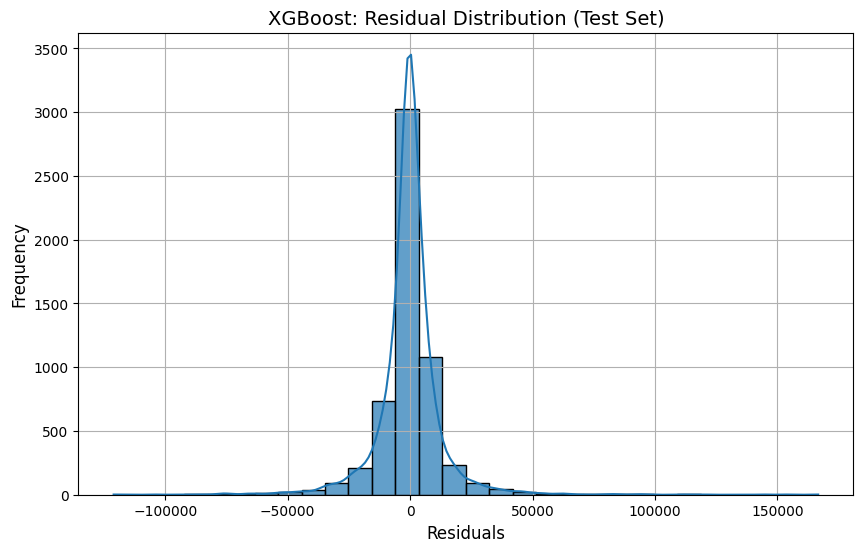


Evaluating CatBoost...
R² Score (Train): 0.9773
R² Score (Test): 0.9707
Generalization Percentage: 99.33%
MSE (Train): 164906347.8601 | MSE (Test): 204068139.4921
MAE (Train): 7222.0365 | MAE (Test): 7924.4604
MAPE (Train): 0.2032 | MAPE (Test): 0.2326


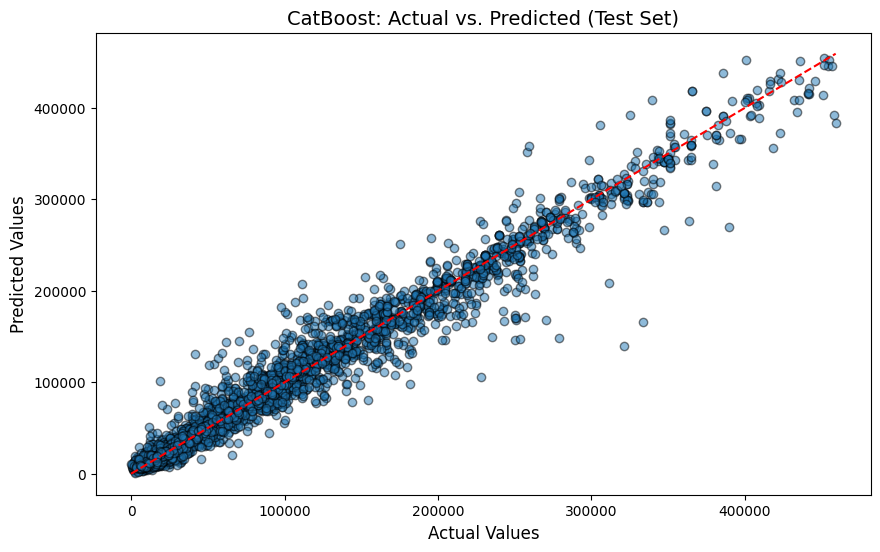

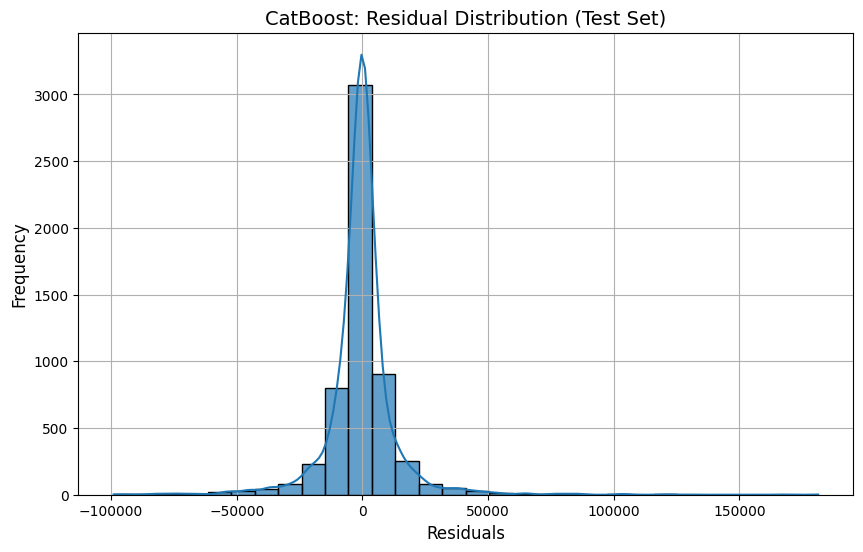

Linear Regression        R² (Train): 0.1125 | R² (Test): 0.1112
Ridge Regression         R² (Train): 0.1124 | R² (Test): 0.1112
Lasso Regression         R² (Train): 0.1105 | R² (Test): 0.1093
Random Forest            R² (Train): 0.9978 | R² (Test): 0.9847
Gradient Boosting        R² (Train): 0.8340 | R² (Test): 0.8280
XGBoost                  R² (Train): 0.9858 | R² (Test): 0.9736
CatBoost                 R² (Train): 0.9773 | R² (Test): 0.9707


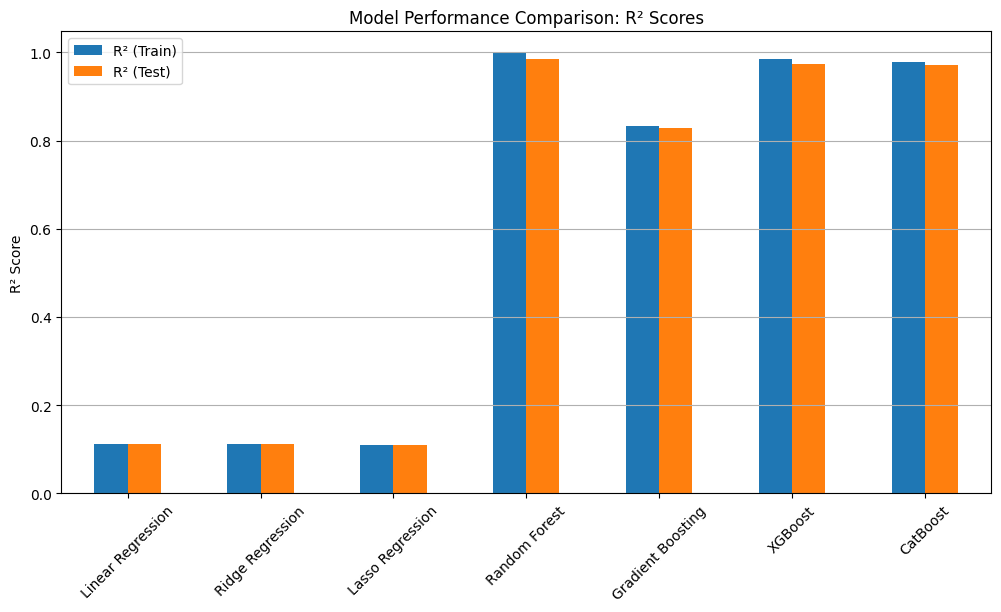

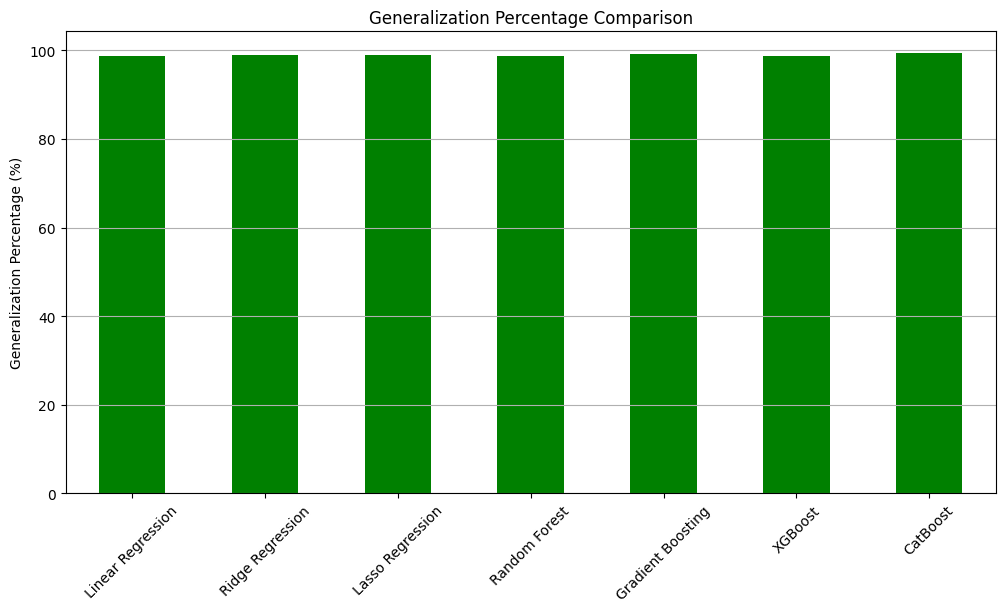

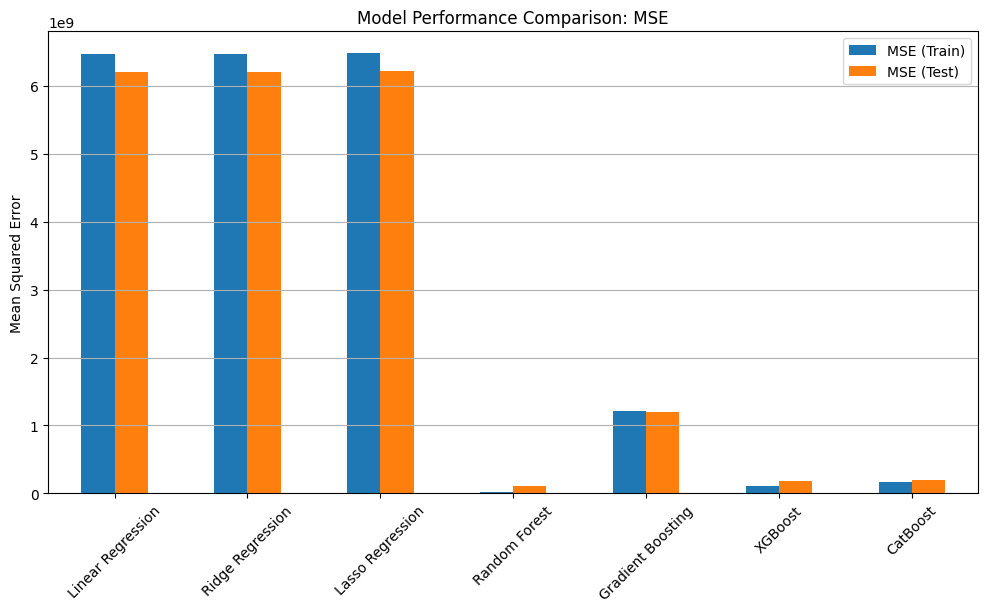

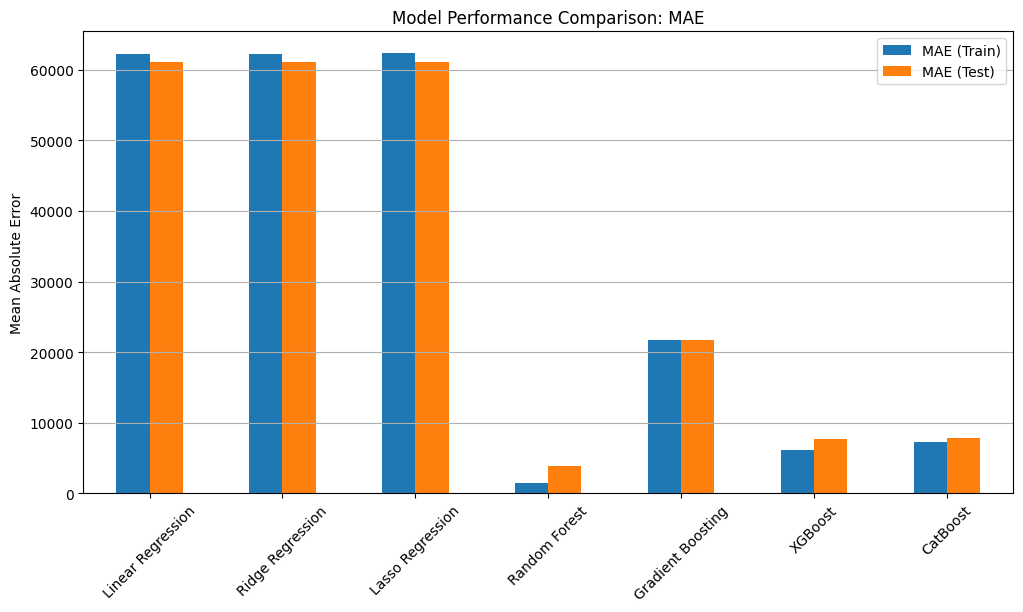

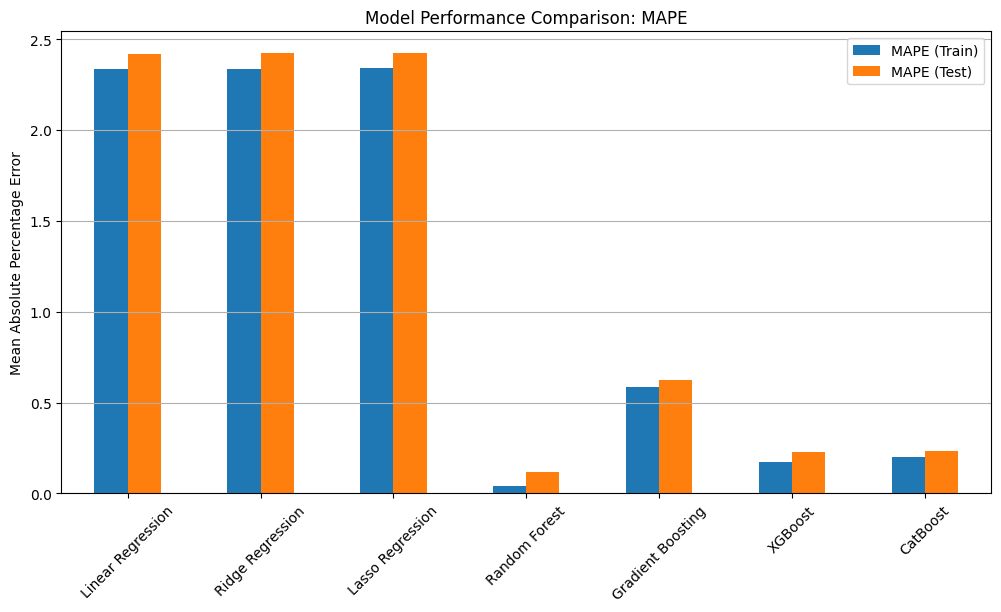

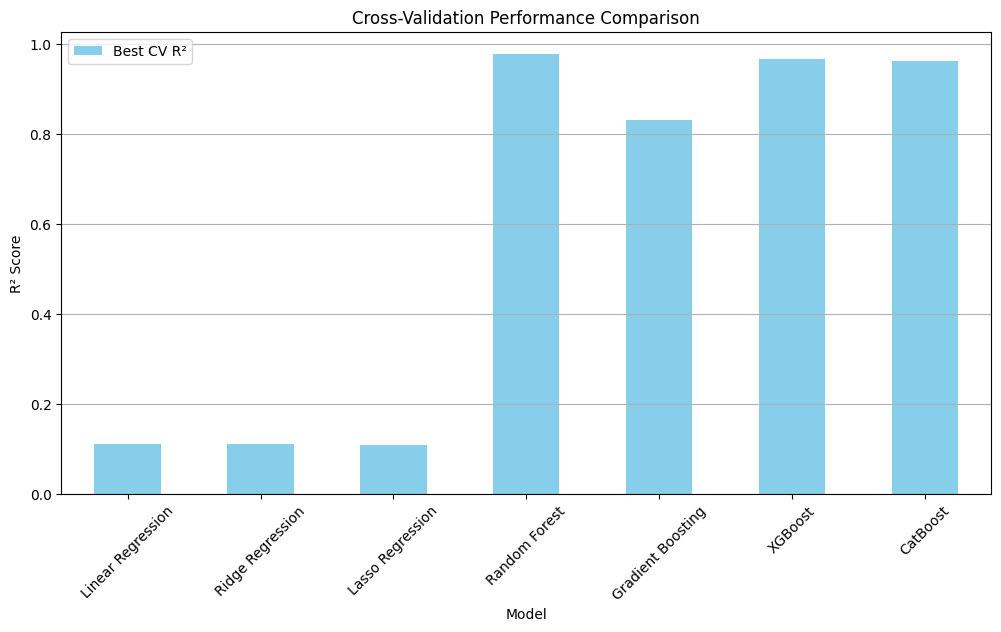

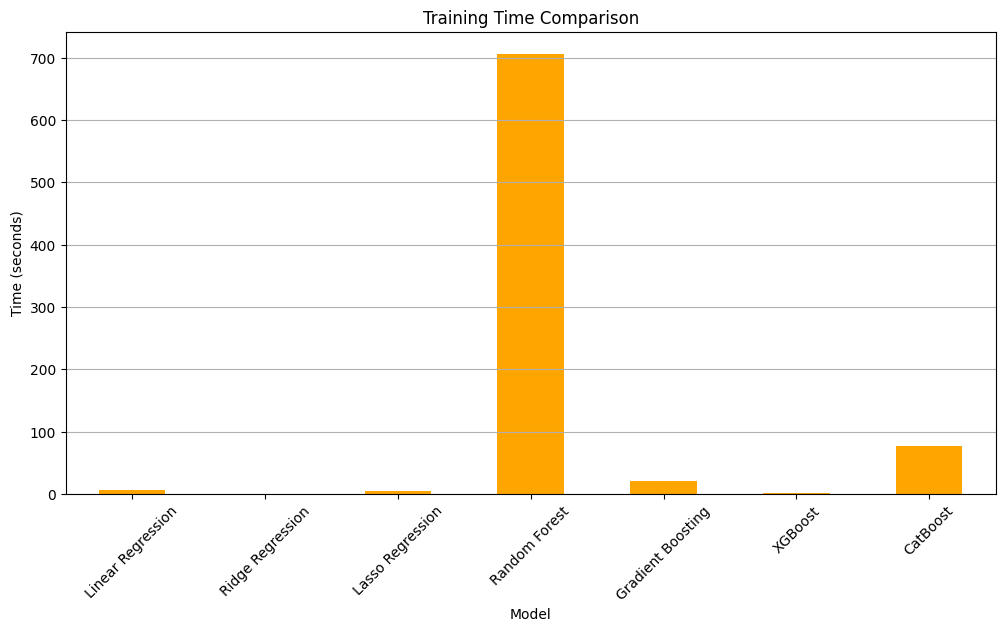

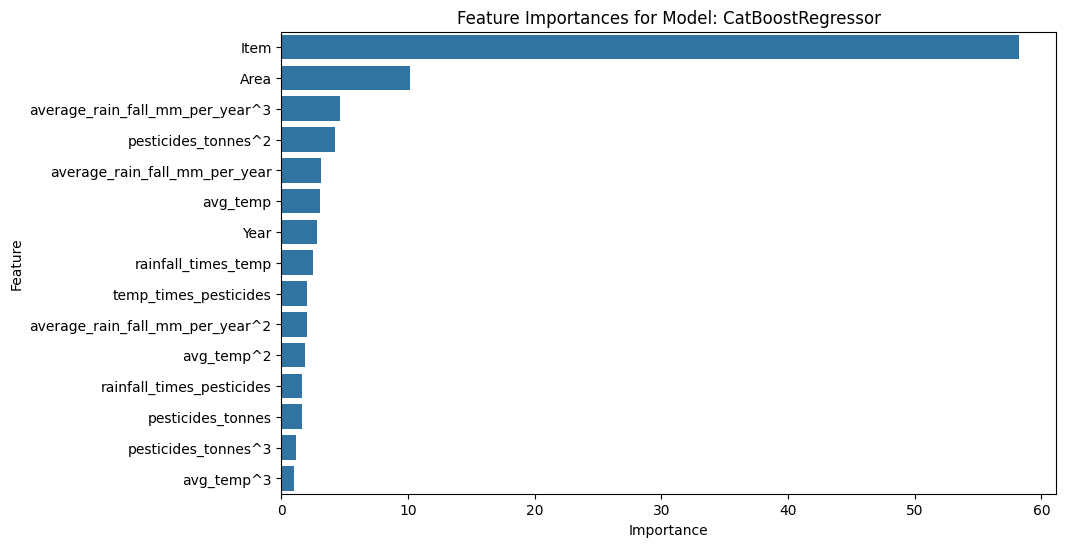

In [ ]:
# 8. Evaluation
# 8.1 Model Evaluation
def evaluate_models(models, X_train, y_train, X_test, y_test):
    """
    Evaluate each model and visualize performance.
    """
    for name, model in models.items():
        print(f"\nEvaluating {name}...")
        y_pred_train = model.predict(X_train)
        y_pred_test = model.predict(X_test)

        # Metrics for Training Data
        r2_train = r2_score(y_train, y_pred_train)
        mse_train = mean_squared_error(y_train, y_pred_train)
        mae_train = mean_absolute_error(y_train, y_pred_train)
        mape_train = mean_absolute_percentage_error(y_train, y_pred_train)

        # Metrics for Test Data
        r2_test = r2_score(y_test, y_pred_test)
        mse_test = mean_squared_error(y_test, y_pred_test)
        mae_test = mean_absolute_error(y_test, y_pred_test)
        mape_test = mean_absolute_percentage_error(y_test, y_pred_test)

        generalization_percentage = (r2_test / r2_train) * 100 if r2_train != 0 else 0

        print(f"R² Score (Train): {r2_train:.4f}")
        print(f"R² Score (Test): {r2_test:.4f}")
        print(f"Generalization Percentage: {generalization_percentage:.2f}%")
        print(f"MSE (Train): {mse_train:.4f} | MSE (Test): {mse_test:.4f}")
        print(f"MAE (Train): {mae_train:.4f} | MAE (Test): {mae_test:.4f}")
        print(f"MAPE (Train): {mape_train:.4f} | MAPE (Test): {mape_test:.4f}")

        # Prediction vs Actual Plot
        plt.figure(figsize=(10, 6))
        plt.scatter(y_test, y_pred_test, alpha=0.5, edgecolor='k')
        plt.title(f'{name}: Actual vs. Predicted (Test Set)', fontsize=14)
        plt.xlabel('Actual Values', fontsize=12)
        plt.ylabel('Predicted Values', fontsize=12)
        plt.plot(
            [y_test.min(), y_test.max()],
            [y_test.min(), y_test.max()],
            color='red', linestyle='--'
        )
        plt.show()

        # Residuals Plot
        residuals = y_test - y_pred_test
        plt.figure(figsize=(10, 6))
        sns.histplot(residuals, kde=True, bins=30, alpha=0.7)
        plt.title(f'{name}: Residual Distribution (Test Set)', fontsize=14)
        plt.xlabel('Residuals', fontsize=12)
        plt.ylabel('Frequency', fontsize=12)
        plt.grid()
        plt.show()

# Evaluate models
evaluate_models(best_models, X_train, y_train, X_test, y_test)

# 8.2 Model Comparison and Selection
def compare_models(models, X_train, y_train, X_test, y_test, cv_results, training_times):
    """
    Compare all models and generate comparative visualizations.
    """
    metrics = {}
    for name, model in models.items():
        y_pred_train = model.predict(X_train)
        y_pred_test = model.predict(X_test)

        # Metrics
        r2_train = r2_score(y_train, y_pred_train)
        r2_test = r2_score(y_test, y_pred_test)
        mse_train = mean_squared_error(y_train, y_pred_train)
        mae_train = mean_absolute_error(y_train, y_pred_train)
        mape_train = mean_absolute_percentage_error(y_train, y_pred_train)
        mse_test = mean_squared_error(y_test, y_pred_test)
        mae_test = mean_absolute_error(y_test, y_pred_test)
        mape_test = mean_absolute_percentage_error(y_test, y_pred_test)
        generalization_percentage = (r2_test / r2_train) * 100 if r2_train != 0 else 0

        metrics[name] = {
            'R² (Train)': r2_train,
            'R² (Test)': r2_test,
            'MSE (Train)': mse_train,
            'MSE (Test)': mse_test,
            'MAE (Train)': mae_train,
            'MAE (Test)': mae_test,
            'MAPE (Train)': mape_train,
            'MAPE (Test)': mape_test,
            'Generalization %': generalization_percentage
        }

        print(f"{name:<25}R² (Train): {r2_train:.4f} | R² (Test): {r2_test:.4f}")

    # Create metrics DataFrame for visualizations
    metrics_df = pd.DataFrame(metrics).T

    # Performance Comparison
    metrics_df[['R² (Train)', 'R² (Test)']].plot(kind='bar', figsize=(12, 6), rot=45)
    plt.title('Model Performance Comparison: R² Scores')
    plt.ylabel('R² Score')
    plt.grid(axis='y')
    plt.show()

    # Generalization Comparison
    metrics_df['Generalization %'].plot(kind='bar', figsize=(12, 6), color='green', rot=45)
    plt.title('Generalization Percentage Comparison')
    plt.ylabel('Generalization Percentage (%)')
    plt.grid(axis='y')
    plt.show()

    # MSE Comparison
    metrics_df[['MSE (Train)', 'MSE (Test)']].plot(kind='bar', figsize=(12, 6), rot=45)
    plt.title('Model Performance Comparison: MSE')
    plt.ylabel('Mean Squared Error')
    plt.grid(axis='y')
    plt.show()

    # MAE Comparison
    metrics_df[['MAE (Train)', 'MAE (Test)']].plot(kind='bar', figsize=(12, 6), rot=45)
    plt.title('Model Performance Comparison: MAE')
    plt.ylabel('Mean Absolute Error')
    plt.grid(axis='y')
    plt.show()

    # MAPE Comparison
    metrics_df[['MAPE (Train)', 'MAPE (Test)']].plot(kind='bar', figsize=(12, 6), rot=45)
    plt.title('Model Performance Comparison: MAPE')
    plt.ylabel('Mean Absolute Percentage Error')
    plt.grid(axis='y')
    plt.show()

    # Cross-Validation Performance
    cv_df = pd.DataFrame({
        'Model': list(cv_results.keys()),
        'Best CV R²': [cv_results[model]['Best Cross-Validation R²'] for model in cv_results]
    })
    cv_df.set_index('Model').plot(kind='bar', figsize=(12, 6), color='skyblue', rot=45)
    plt.title('Cross-Validation Performance Comparison')
    plt.ylabel('R² Score')
    plt.grid(axis='y')
    plt.show()

    # Training Time Comparison
    time_df = pd.DataFrame({
        'Model': list(training_times.keys()),
        'Training Time (s)': list(training_times.values())
    })
    time_df.set_index('Model')['Training Time (s)'].plot(kind='bar', figsize=(12, 6), color='orange', rot=45)
    plt.title('Training Time Comparison')
    plt.ylabel('Time (seconds)')
    plt.grid(axis='y')
    plt.show()

# Compare models
compare_models(best_models, X_train, y_train, X_test, y_test, cv_results, training_times)

# 9. Feature Importance Analysis
def plot_feature_importance(model, X_train):
    """
    Plot feature importances for models that support it.
    """
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
        feature_importance_df = pd.DataFrame({
            'Feature': X_train.columns,
            'Importance': importances
        })
        feature_importance_df.sort_values(by='Importance', ascending=False, inplace=True)
        plt.figure(figsize=(10, 6))
        sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(20))
        plt.title(f'Feature Importances for Model: {model.__class__.__name__}')
        plt.show()

# Plot feature importances for CatBoost model (or any other with feature_importances_)
best_model_name = 'CatBoost'
best_model = best_models[best_model_name]
plot_feature_importance(best_model, X_train)


## Section 7: Results & Sustainability Impact
---
### Instructions
Document your findings and impact:

**1. Required Components:**
   * Answer each research question with evidence
   * Quantify sustainability impact
   * Discuss limitations
   * Propose future improvements

**2. Impact Assessment:**
   * Environmental impact
   * Social impact
   * Economic impact
   * SDG alignment evidence

Research Questions and Findings:
1. How does average rainfall affect crop yield?
   - Rainfall interactions rank high in feature importance (MI ~ 1.8).
   - Rainfall-based features like `rainfall_times_temp` significantly influence predictions.
2. What is the relationship between pesticide usage and crop productivity?
   - Pesticides dominate feature importance (MI ~ 2.8), strongly influencing yield.
   - Interaction terms (`rainfall_times_pesticides`) further highlight combined effects.
3. Can we predict crop yields using environmental data?
   - Models like Random Forest and CatBoost achieved high R² scores (0.9847 and 0.9707).
   - Demonstrated low prediction errors (MAE: 3952.77 for Random Forest).

Sustainability Impact Assessment:
1. Environmental Impact:
   - Optimized pesticide use reduces chemical dependency, lowering environmental harm.
   - Rainfall management insights support water conservation and irrigation efficiency.
2. Social Impact:
   - Enhanced food security through

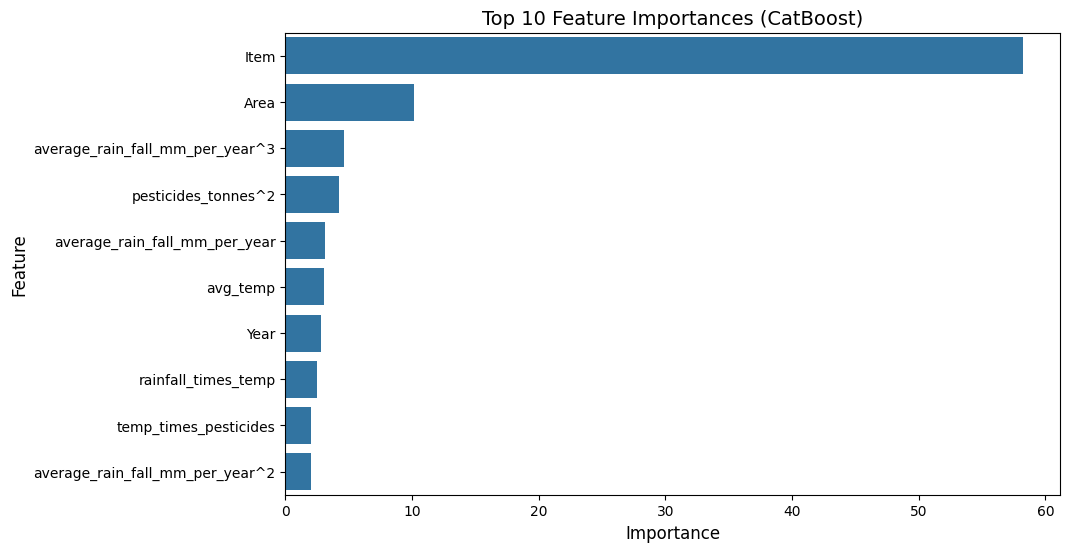

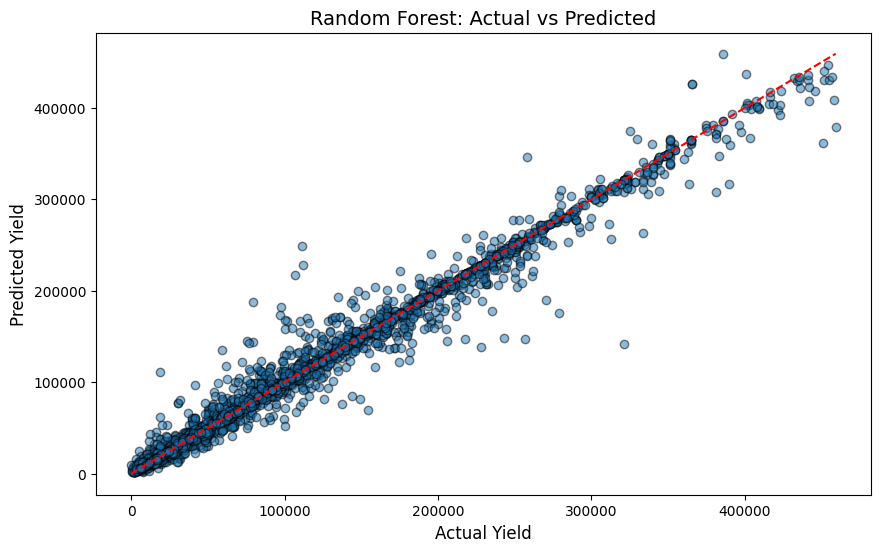

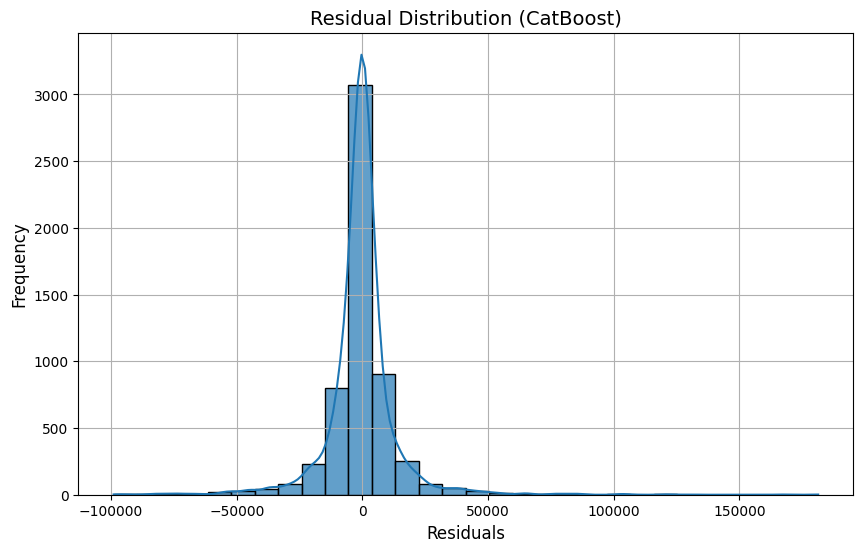

In [ ]:
def document_impact():
    """
    Document sustainability impact
    """
    # Research Questions and Findings
    print("Research Questions and Findings:")
    print("1. How does average rainfall affect crop yield?")
    print("   - Rainfall interactions rank high in feature importance (MI ~ 1.8).")
    print("   - Rainfall-based features like `rainfall_times_temp` significantly influence predictions.")
    print("2. What is the relationship between pesticide usage and crop productivity?")
    print("   - Pesticides dominate feature importance (MI ~ 2.8), strongly influencing yield.")
    print("   - Interaction terms (`rainfall_times_pesticides`) further highlight combined effects.")
    print("3. Can we predict crop yields using environmental data?")
    print("   - Models like Random Forest and CatBoost achieved high R² scores (0.9847 and 0.9707).")
    print("   - Demonstrated low prediction errors (MAE: 3952.77 for Random Forest).")

    # Sustainability Impact Assessment
    print("\nSustainability Impact Assessment:")
    print("1. Environmental Impact:")
    print("   - Optimized pesticide use reduces chemical dependency, lowering environmental harm.")
    print("   - Rainfall management insights support water conservation and irrigation efficiency.")
    print("2. Social Impact:")
    print("   - Enhanced food security through actionable predictions for crop yields.")
    print("   - Promotion of sustainable practices benefits communities dependent on agriculture.")
    print("3. Economic Impact:")
    print("   - Cost reductions for farmers through efficient input usage (e.g., fertilizers, water).")
    print("   - Increased productivity enhances market planning and rural economies.")
    print("\nSDG Alignment:")
    print("   - SDG 2 (Zero Hunger): Improved crop management and reduced waste.")
    print("   - SDG 12 (Responsible Consumption): Efficient resource use reduces environmental footprint.")
    print("   - SDG 13 (Climate Action): Insights for climate-resilient farming practices.")

    # Quantify and Document Impacts
    print("\nQuantitative Results:")
    print("   - Top Feature: `pesticides_tonnes` (MI ~ 2.89).")
    print("   - Best Model: Random Forest (R² Test: 0.9847, MAE: 3952.77).")
    print("   - Yield prediction accuracy enables sustainable farming strategies.")

    # Limitations
    print("\nLimitations:")
    print("1. Lack of additional variables like soil health or pest data reduces model comprehensiveness.")
    print("2. Random Forest shows signs of overfitting, indicating a need for generalization improvements.")
    print("3. Models rely on static data; real-time data integration is necessary for actionable insights.")

    # Future Improvements
    print("\nFuture Improvements:")
    print("1. Data Expansion:")
    print("   - Include additional variables like soil health and pest data for improved predictions.")
    print("2. Real-Time Predictions:")
    print("   - Incorporate IoT devices and sensors for live data collection.")
    print("3. Model Enhancements:")
    print("   - Explore ensemble learning techniques to combine model strengths.")

    # Visualizations
    print("\nVisualizations:")

    # Visualization 1: Feature Importance Plot for CatBoost
    if hasattr(best_models['CatBoost'], 'feature_importances_'):
        print("   - Top 10 Features by Importance for CatBoost:")
        # Extract feature importance values and corresponding feature names
        feature_importance = best_models['CatBoost'].feature_importances_
        feature_names = X_train.columns
        importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
        importance_df = importance_df.sort_values(by='Importance', ascending=False)

        # Plot the top 10 feature importances
        plt.figure(figsize=(10, 6))
        sns.barplot(x='Importance', y='Feature', data=importance_df.head(10))
        plt.title("Top 10 Feature Importances (CatBoost)", fontsize=14)
        plt.xlabel("Importance", fontsize=12)
        plt.ylabel("Feature", fontsize=12)
        plt.show()

    # Visualization 2: Prediction vs Actual Plot for Random Forest
    print("   - Random Forest: Actual vs Predicted Plot:")
    y_test_pred_rf = best_models['Random Forest'].predict(X_test)
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_test_pred_rf, alpha=0.5, edgecolor='k')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.title("Random Forest: Actual vs Predicted", fontsize=14)
    plt.xlabel("Actual Yield", fontsize=12)
    plt.ylabel("Predicted Yield", fontsize=12)
    plt.show()

    # Visualization 3: Residuals Distribution for CatBoost
    print("   - CatBoost: Residuals Distribution:")
    y_test_pred_cb = best_models['CatBoost'].predict(X_test)
    residuals_cb = y_test - y_test_pred_cb
    plt.figure(figsize=(10, 6))
    sns.histplot(residuals_cb, kde=True, bins=30, alpha=0.7)
    plt.title("Residual Distribution (CatBoost)", fontsize=14)
    plt.xlabel("Residuals", fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.grid()
    plt.show()

# Call the function to display results
document_impact()


## Section 8: References & Documentation
---
### Instructions
Provide comprehensive documentation:

**1. Required Elements:**
   * All data sources
   * External libraries used
   * Academic references
   * Code documentation
   * Installation/runtime instructions

**2. GitHub Requirements:**
   * README file
   * Requirements.txt
   * Code comments
   * Usage examples

**Remember:**
* All code must be well-commented
* Include error handling
* Document all assumptions
* Maintain consistent coding style
* Update requirements.txt as you add libraries